In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/NLP

/content/drive/.shortcut-targets-by-id/1plMjpYu4pyxTZsV33MlYa9xEP127qxWB/NLP_Project


In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm

In [4]:
trainData = np.load('fin_t2_train.npy')
trainLabels = open('finalTrainLabels.labels', 'r').readlines()
testData = np.load('fin_t2_test.npy')
testLabels = open('finalTestLabels.labels', 'r').readlines()
valData = np.load('fin_t2_trial.npy')
valLabels = open('finalDevLabels.labels', 'r').readlines()
for i in tqdm(range(len(trainLabels))):
    trainLabels[i] = int(trainLabels[i])
for i in tqdm(range(len(testLabels))):
    testLabels[i] = int(testLabels[i])
for i in tqdm(range(len(valLabels))):
    valLabels[i] = int(valLabels[i])
trainLabels = np.array(trainLabels)
testLabels = np.array(testLabels)
valLabels = np.array(valLabels)
trainLabels = trainLabels.reshape((-1, ))
testLabels = testLabels.reshape((-1, ))
valLabels = valLabels.reshape((-1, ))

100%|██████████| 10008/10008 [00:00<00:00, 884239.01it/s]


In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
nbrs = [1,2,3,4,5,6,7,8,9]
weights = ['distance', 'uniform']
algorithm = ['auto']

In [7]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [8]:
f1DictTrain = {}
precisionDictTrain = {}
recallDictTrain = {}
accDictTrain = {}
f1DictTest = {}
precisionDictTest = {}
recallDictTest = {}
accDictTest = {}
f1DictVal = {}
precisionDictVal = {}
recallDictVal = {}
accDictVal = {}

In [9]:
for i in tqdm(range(len(nbrs))):
    nbr = nbrs[i]
    for wt in weights:
        for algo in algorithm:
            neigh = KNeighborsClassifier(n_neighbors=nbr, weights=wt, algorithm=algo)
            neigh.fit(trainData, trainLabels)
            trainPreds = neigh.predict(trainData)
            testPreds = neigh.predict(testData)
            valPreds = neigh.predict(valData)
            key = str(nbr) + ' ' + str(wt)
            f1DictTrain[key] = f1_score(trainLabels, trainPreds, average='weighted')
            precisionDictTrain[key] = precision_score(trainLabels, trainPreds, average='weighted')
            recallDictTrain[key] = recall_score(trainLabels, trainPreds, average='weighted')
            accDictTrain[key] = accuracy_score(trainLabels, trainPreds, normalize=True)
            f1DictTest[key] = f1_score(testLabels, testPreds, average='weighted')
            precisionDictTest[key] = precision_score(testLabels, testPreds, average='weighted')
            recallDictTest[key] = recall_score(testLabels, testPreds, average='weighted')
            accDictTest[key] = accuracy_score(testLabels, testPreds, normalize=True)
            f1DictVal[key] = f1_score(valLabels, valPreds, average='weighted')
            precisionDictVal[key] = precision_score(valLabels, valPreds, average='weighted')
            recallDictVal[key] = recall_score(valLabels, valPreds, average='weighted')
            accDictVal[key] = accuracy_score(valLabels, valPreds, normalize=True)
            # print(nbr, wt, algo, neigh.score(testData, testLabels))

  0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 11%|█         | 1/9 [33:18<4:26:31, 1998.92s/it]/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/pytho

In [24]:
print(f1DictTrain)
print(f1DictTest)
print(f1DictVal)

{'1 distance': 0.9959791351510752, '1 uniform': 0.9959791351510752, '2 distance': 0.9960883160122923, '2 uniform': 0.5288109396652604, '3 distance': 0.9960883498223463, '3 uniform': 0.417304334828394, '4 distance': 0.9962011066964266, '4 uniform': 0.3797515561995707, '5 distance': 0.9962016565897396, '5 uniform': 0.358971570472431, '6 distance': 0.996130230618631, '6 uniform': 0.3411489394269061, '7 distance': 0.9961591973062089, '7 uniform': 0.3267606580537038, '8 distance': 0.9961592985819192, '8 uniform': 0.3136622820930926, '9 distance': 0.9961592985819192, '9 uniform': 0.3001957142441982}
{'1 distance': 0.08138305962759643, '1 uniform': 0.08138305962759643, '2 distance': 0.08128765115274146, '2 uniform': 0.07772202274542682, '3 distance': 0.08595057842855783, '3 uniform': 0.08250204537892737, '4 distance': 0.09357662207849832, '4 uniform': 0.09192726986948946, '5 distance': 0.09707029201772531, '5 uniform': 0.09601927359726313, '6 distance': 0.10131209551250914, '6 uniform': 0.099

In [25]:
print(precisionDictTrain)
print(precisionDictTest)
print(precisionDictVal)

{'1 distance': 0.9960023946952191, '1 uniform': 0.9960023946952191, '2 distance': 0.9961074682292995, '2 uniform': 0.5992249663192806, '3 distance': 0.9961093871200875, '3 uniform': 0.5110225805969425, '4 distance': 0.9962204156282634, '4 uniform': 0.4660947667826105, '5 distance': 0.9962236920956404, '5 uniform': 0.4279233490132687, '6 distance': 0.9961469789923316, '6 uniform': 0.3972631683809812, '7 distance': 0.9961764441791597, '7 uniform': 0.37641224961894526, '8 distance': 0.9961772158929529, '8 uniform': 0.36176075982945405, '9 distance': 0.9961772158929529, '9 uniform': 0.34860867107926113}
{'1 distance': 0.1430822098658548, '1 uniform': 0.1430822098658548, '2 distance': 0.14591562297003996, '2 uniform': 0.10990807663037115, '3 distance': 0.17010809425571713, '3 uniform': 0.19946199845600404, '4 distance': 0.17391138695977235, '4 uniform': 0.17231995855580365, '5 distance': 0.1715602277667867, '5 uniform': 0.17014368913110087, '6 distance': 0.16098761132654574, '6 uniform': 0.

In [26]:
print(recallDictTrain)
print(recallDictTest)
print(recallDictVal)

{'1 distance': 0.9959709681106412, '1 uniform': 0.9959709681106412, '2 distance': 0.9960852668876443, '2 uniform': 0.573036918504972, '3 distance': 0.9960852668876443, '3 uniform': 0.4656817922048234, '4 distance': 0.9961995656646474, '4 uniform': 0.42280546348154074, '5 distance': 0.9961995656646474, '5 uniform': 0.3997171105269174, '6 distance': 0.9961281289290205, '6 uniform': 0.3827723168362098, '7 distance': 0.9961567036232712, '7 uniform': 0.3698994170762373, '8 distance': 0.9961567036232712, '8 uniform': 0.3595410904103326, '9 distance': 0.9961567036232712, '9 uniform': 0.3488827294547948}
{'1 distance': 0.21435, '1 uniform': 0.21435, '2 distance': 0.2143, '2 uniform': 0.2155, '3 distance': 0.2133, '3 uniform': 0.21395, '4 distance': 0.19955, '4 uniform': 0.2002, '5 distance': 0.1831, '5 uniform': 0.1838, '6 distance': 0.19, '6 uniform': 0.1904, '7 distance': 0.19325, '7 uniform': 0.19285, '8 distance': 0.1845, '8 uniform': 0.1851, '9 distance': 0.19575, '9 uniform': 0.1966}
{'1

In [52]:
print(accDictTrain)
print(accDictTest)
print(accDictVal)

{'1 distance': 0.9959709681106412, '1 uniform': 0.9959709681106412, '2 distance': 0.9960852668876443, '2 uniform': 0.573036918504972, '3 distance': 0.9960852668876443, '3 uniform': 0.4656817922048234, '4 distance': 0.9961995656646474, '4 uniform': 0.42280546348154074, '5 distance': 0.9961995656646474, '5 uniform': 0.3997171105269174, '6 distance': 0.9961281289290205, '6 uniform': 0.3827723168362098, '7 distance': 0.9961567036232712, '7 uniform': 0.3698994170762373, '8 distance': 0.9961567036232712, '8 uniform': 0.3595410904103326, '9 distance': 0.9961567036232712, '9 uniform': 0.3488827294547948}
{'1 distance': 0.21435, '1 uniform': 0.21435, '2 distance': 0.2143, '2 uniform': 0.2155, '3 distance': 0.2133, '3 uniform': 0.21395, '4 distance': 0.19955, '4 uniform': 0.2002, '5 distance': 0.1831, '5 uniform': 0.1838, '6 distance': 0.19, '6 uniform': 0.1904, '7 distance': 0.19325, '7 uniform': 0.19285, '8 distance': 0.1845, '8 uniform': 0.1851, '9 distance': 0.19575, '9 uniform': 0.1966}
{'1

In [17]:
f1DistanceTrain = []
f1UniformTrain = []
f1DistanceTest = []
f1UniformTest = []
f1DistanceVal = []
f1UniformVal = []
precisionDistanceTrain = []
precisionUniformTrain = []
precisionDistanceTest = []
precisionUniformTest = []
precisionDistanceVal = []
precisionUniformVal = []
recallDistanceTrain = []
recallUniformTrain = []
recallDistanceTest = []
recallUniformTest = []
recallDistanceVal = []
recallUniformVal = []
accDistanceTrain = []
accUniformTrain = []
accDistanceTest = []
accUniformTest = []
accDistanceVal = []
accUniformVal = []
for key in f1DictTrain:
    i = key.split()
    if i[1] == 'distance':
        f1DistanceTrain.append(f1DictTrain[key])
        f1DistanceTest.append(f1DictTest[key])
        f1DistanceVal.append(f1DictVal[key])
        precisionDistanceTrain.append(precisionDictTrain[key])
        precisionDistanceTest.append(precisionDictTest[key])
        precisionDistanceVal.append(precisionDictVal[key])
        recallDistanceTrain.append(recallDictTrain[key])
        recallDistanceTest.append(recallDictTest[key])
        recallDistanceVal.append(recallDictVal[key])
        accDistanceTrain.append(accDictTrain[key])
        accDistanceTest.append(accDictTest[key])
        accDistanceVal.append(accDictVal[key])
    else:
        f1UniformTrain.append(f1DictTrain[key])
        f1UniformTest.append(f1DictTest[key])
        f1UniformVal.append(f1DictVal[key])
        precisionUniformTrain.append(precisionDictTrain[key])
        precisionUniformTest.append(precisionDictTest[key])
        precisionUniformVal.append(precisionDictVal[key])
        recallUniformTrain.append(recallDictTrain[key])
        recallUniformTest.append(recallDictTest[key])
        recallUniformVal.append(recallDictVal[key])
        accUniformTrain.append(accDictTrain[key])
        accUniformTest.append(accDictTest[key])
        accUniformVal.append(accDictVal[key])


In [21]:
from matplotlib import pyplot as plt
plt.style.use('seaborn')

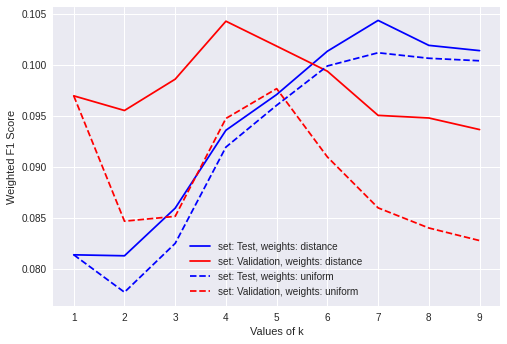

In [47]:
plt.plot(np.linspace(1, 9, 9), f1DistanceTest, label='set: Test, weights: distance', linestyle='solid', color='blue')
plt.plot(np.linspace(1, 9, 9), f1DistanceVal, label='set: Validation, weights: distance', linestyle='solid', color='red')
plt.plot(np.linspace(1, 9, 9), f1UniformTest, label='set: Test, weights: uniform', linestyle='dashed', color='blue')
plt.plot(np.linspace(1, 9, 9), f1UniformVal, label='set: Validation, weights: uniform', linestyle='dashed', color='red')
plt.legend()
plt.xlabel('Values of k')
plt.ylabel('Weighted F1 Score')
plt.show()

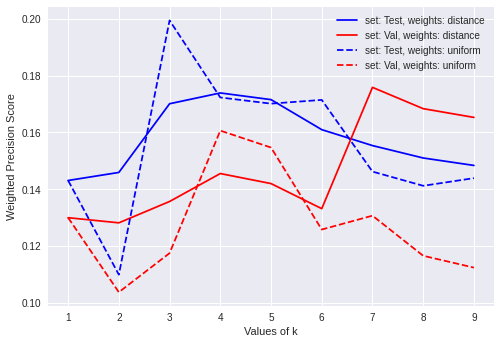

In [48]:
plt.plot(np.linspace(1, 9, 9), precisionDistanceTest, label='set: Test, weights: distance', linestyle='solid', color='blue')
plt.plot(np.linspace(1, 9, 9), precisionDistanceVal, label='set: Val, weights: distance', linestyle='solid', color='red')
plt.plot(np.linspace(1, 9, 9), precisionUniformTest, label='set: Test, weights: uniform', linestyle='dashed', color='blue')
plt.plot(np.linspace(1, 9, 9), precisionUniformVal, label='set: Val, weights: uniform', linestyle='dashed', color='red')
plt.legend()
plt.xlabel('Values of k')
plt.ylabel('Weighted Precision Score')
plt.show()

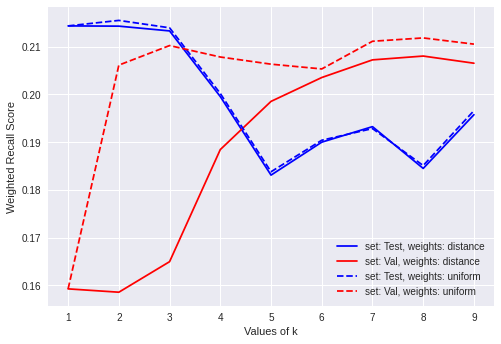

In [49]:
plt.plot(np.linspace(1, 9, 9), recallDistanceTest, label='set: Test, weights: distance', linestyle='solid', color='blue')
plt.plot(np.linspace(1, 9, 9), recallDistanceVal, label='set: Val, weights: distance', linestyle='solid', color='red')
plt.plot(np.linspace(1, 9, 9), recallUniformTest, label='set: Test, weights: uniform', linestyle='dashed', color='blue')
plt.plot(np.linspace(1, 9, 9), recallUniformVal, label='set: Val, weights: uniform', linestyle='dashed', color='red')
plt.legend()
plt.xlabel('Values of k')
plt.ylabel('Weighted Recall Score')
plt.show()

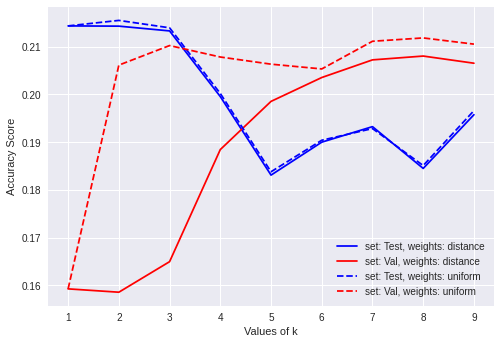

In [53]:
plt.plot(np.linspace(1, 9, 9), accDistanceTest, label='set: Test, weights: distance', linestyle='solid', color='blue')
plt.plot(np.linspace(1, 9, 9), accDistanceVal, label='set: Val, weights: distance', linestyle='solid', color='red')
plt.plot(np.linspace(1, 9, 9), accUniformTest, label='set: Test, weights: uniform', linestyle='dashed', color='blue')
plt.plot(np.linspace(1, 9, 9), accUniformVal, label='set: Val, weights: uniform', linestyle='dashed', color='red')
plt.legend()
plt.xlabel('Values of k')
plt.ylabel('Accuracy Score')
plt.show()

In [55]:
newModel = KNeighborsClassifier(n_neighbors=2, weights='uniform', algorithm='auto')
newModel.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=2)

In [29]:
newModel.score(trainData, trainLabels)

0.9959709681106412

In [56]:
import pickle as pk

In [59]:
filename = 'WE_KNN_uniform_2'
pk.dump(newModel,open(filename,'wb'))

In [60]:
ls

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
100k_t1_test.npy         noWE_SVM_linear_0.2
100k_t1_train.npy        noWE_SVM_linear_0.25
100k_t1_trial.npy        noWE_SVM_linear_0.3
100k_t2_test.npy         noWE_SVM_linear_0.35
100k_t2_train.npy        noWE_SVM_linear_0.4
100k_t2_trial.npy        noWE_SVM_linear_0.5
bestModelAcc.h5          noWE_SVM_linear_1
bestModel.h5             noWE_SVM_linear_2
bestModelLoss.h5         noWE_SVM_linear_5
finalDevLabels.labels    noWE_t2_test.npy
finalTestLabels.labels   noWE_t2_train.npy
finalTrainLabels.labels  noWE_t2_trial.npy
fin_noWE_t2_test.npy     preprocessed_test_text.txt
fin_noWE_t2_train.npy    preprocessed_train_text.txt
fin_noWE_t2_trial.npy    preprocessed_trial_text.txt
fin_t1_test.npy          t2_test.npy
fin_t1_train.npy         t2_train.npy
fin_t1_trial.npy         t2_trial.npy
fin_t2_test.npy          tweet_by_ID_08_10_2021__12_50_02.txt
fin_t2_train.npy      